#Data Loading

In [1]:
#Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from sklearn.metrics.pairwise import cosine_similarity
import xgboost as xgb

In [2]:
# Loading the data of Anime, User list and Watching Status dataframes
anime_df = pd.read_csv('/content/drive/MyDrive/Orginal files/anime.csv')
user_list_df = pd.read_csv("/content/drive/MyDrive/Orginal files/user_list.csv")
watching_status_df = pd.read_csv("/content/drive/MyDrive/Orginal files/watching_status.csv")

In [3]:
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [4]:
user_list_df.head()

,Unnamed: 0,user_id,anime_id,rating,watching_status,watched_episodes
0,103975409,336145,2251,10,2,13
1,106163638,343247,2787,9,2,24
2,40226351,130592,235,9,1,752
3,11770069,38258,10572,0,3,1
4,60530240,196188,22729,8,2,12


In [5]:
watching_status_df.head()

,status,description
0,1,Currently Watching
1,2,Completed
2,3,On Hold
3,4,Dropped
4,6,Plan to Watch


#Data Structure and Summary

In [6]:
# Defining a function to print the Dataframe's Structure, Data Types, Statistics, Missing Values and Unique Value Counts
def info(df, name):
    print(f"{name} DataFrame structure:")
    print(df.shape, "\n")  # Rows and columns

    print("Data Types:")
    print(df.dtypes, "\n")  # Data types of columns

    print("Summary Statistics:")
    print(df.describe(), "\n")  # Summary statistics for numerical columns

    print("Missing Values:")
    print(df.isnull().sum(), "\n")  # Counts of missing values per column

    print("Unique Value Counts:")
    for col in df.columns:
        print(f"{col} has {df[col].nunique()} unique values")  # Unique value counts for each column
    print("\n")


In [7]:
#info of the Anime dataset
info(anime_df, "Anime")

Anime DataFrame structure:
(17562, 35) 

Data Types:
MAL_ID            int64
Name             object
Score            object
Genres           object
English name     object
Japanese name    object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
dtype: object 

Summary Statistics:
             MAL_ID    Popularity       Members      Favorites       Wa

In [8]:
#info of the User dataset
info(user_list_df, "User List")

User List DataFrame structure:
(546123, 6) 

Data Types:
Unnamed: 0          int64
user_id             int64
anime_id            int64
rating              int64
watching_status     int64
watched_episodes    int64
dtype: object 

Summary Statistics:
         Unnamed: 0        user_id       anime_id         rating  \
count  5.461230e+05  546123.000000  546123.000000  546123.000000   
mean   5.459337e+07  176748.767602   16503.319686       4.255953   
std    3.151565e+07  101800.952535   13802.151715       3.916720   
min    9.200000e+02       3.000000       1.000000       0.000000   
25%    2.736854e+07   88692.500000    3210.000000       0.000000   
50%    5.456106e+07  176958.000000   12467.000000       6.000000   
75%    8.187903e+07  265056.500000   30885.000000       8.000000   
max    1.092245e+08  353401.000000   48491.000000      10.000000   

       watching_status  watched_episodes  
count    546123.000000     546123.000000  
mean          3.084919         12.162637  
std      

In [9]:
#info of the Watching status dataset
info(watching_status_df, "Watching Status")

Watching Status DataFrame structure:
(5, 2) 

Data Types:
status           int64
 description    object
dtype: object 

Summary Statistics:
         status
count  5.000000
mean   3.200000
std    1.923538
min    1.000000
25%    2.000000
50%    3.000000
75%    4.000000
max    6.000000 

Missing Values:
status          0
 description    0
dtype: int64 

Unique Value Counts:
status has 5 unique values
 description has 5 unique values




#Data Cleaning and Preprocessing

In [10]:
# Preprocessing the anime_df and cleaning the dataframe
anime_stats_df = anime_df.copy()

anime_stats_df.rename(columns={'MAL_ID': 'anime_id', 'Score': 'avg_score', 'Rating': 'age_rating'}, inplace=True)
anime_stats_df.columns = anime_stats_df.columns.str.lower()
anime_stats_df['genres'] = anime_stats_df['genres'].astype(str)
anime_stats_df['episodes'] = pd.to_numeric(anime_stats_df['episodes'], errors='coerce')
anime_stats_df['ranked'] = pd.to_numeric(anime_stats_df['ranked'], errors='coerce')
anime_stats_df['avg_score'] = pd.to_numeric(anime_stats_df['avg_score'], errors='coerce')
anime_stats_df.fillna({'aired': 'Unknown', 'avg_score': 0, 'ranked': 0}, inplace=True)

categorical_columns = ['type', 'source', 'age_rating']
for col in categorical_columns:
    anime_stats_df[col] = anime_stats_df[col].astype('category')


In [11]:
#Columns in Anime_stats_df
anime_stats_df.columns

Index(['anime_id', 'name', 'avg_score', 'genres', 'english name',
       'japanese name', 'type', 'episodes', 'aired', 'premiered', 'producers',
       'licensors', 'studios', 'source', 'duration', 'age_rating', 'ranked',
       'popularity', 'members', 'favorites', 'watching', 'completed',
       'on-hold', 'dropped', 'plan to watch', 'score-10', 'score-9', 'score-8',
       'score-7', 'score-6', 'score-5', 'score-4', 'score-3', 'score-2',
       'score-1'],
      dtype='object')

In [12]:
# Encoding 'genres' coulumn with label encoder
from sklearn.preprocessing import LabelEncoder
genres_encoder = LabelEncoder()
anime_stats_df['genres_encoded'] = genres_encoder.fit_transform(anime_stats_df['genres'])

In [13]:
#Transformed anime stats dataset
anime_stats_df.head()

,anime_id,name,avg_score,genres,english name,japanese name,type,episodes,aired,premiered,...,score-9,score-8,score-7,score-6,score-5,score-4,score-3,score-2,score-1,genres_encoded
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,31
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",Unknown,...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,799
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,1428
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,1345
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,2108


In [14]:
# Merging user_list_df with watching_status_df, directly replacing watching_status with their descriptions
user_stats_df = pd.merge(user_list_df, watching_status_df, how="left", left_on='watching_status', right_on='status')
user_stats_df['watching_status'] = user_stats_df[ ' description']  # Updating watching_status with descriptions
user_stats_df.drop(['status', ' description'], axis=1, inplace=True)  # Dropping now-redundant columns
user_stats_df.rename(columns={'rating': 'score'}, inplace=True) # renaming columns

In [15]:
#Columns in User_stats_df
user_stats_df.columns

Index(['Unnamed: 0', 'user_id', 'anime_id', 'score', 'watching_status',
       'watched_episodes'],
      dtype='object')

In [16]:
#Transformed user stats dataset
user_stats_df.head()

,Unnamed: 0,user_id,anime_id,score,watching_status,watched_episodes
0,103975409,336145,2251,10,Completed,13
1,106163638,343247,2787,9,Completed,24
2,40226351,130592,235,9,Currently Watching,752
3,11770069,38258,10572,0,On Hold,1
4,60530240,196188,22729,8,Completed,12


#EDA

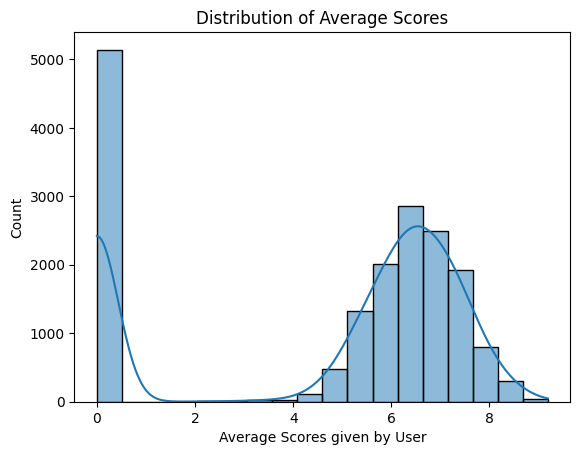

In [17]:
# Distribution of Average Scores
sns.histplot(anime_stats_df['avg_score'], kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Scores given by User')
plt.ylabel('Count')
plt.show()

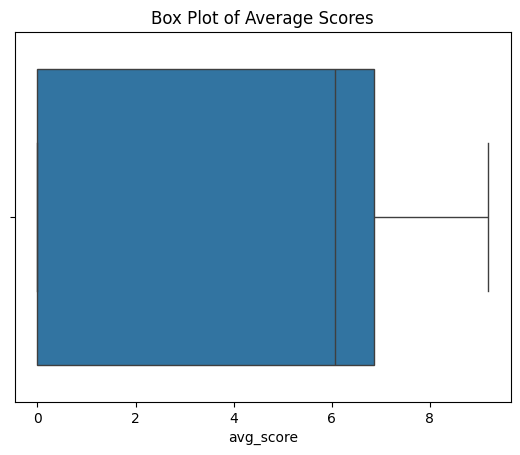

In [18]:
# Box Plot of Average Scores

sns.boxplot(x=anime_stats_df['avg_score'])
plt.title('Box Plot of Average Scores')
plt.show()

<ipython-input-19-b66d74062fbc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  type_countplot = sns.countplot(


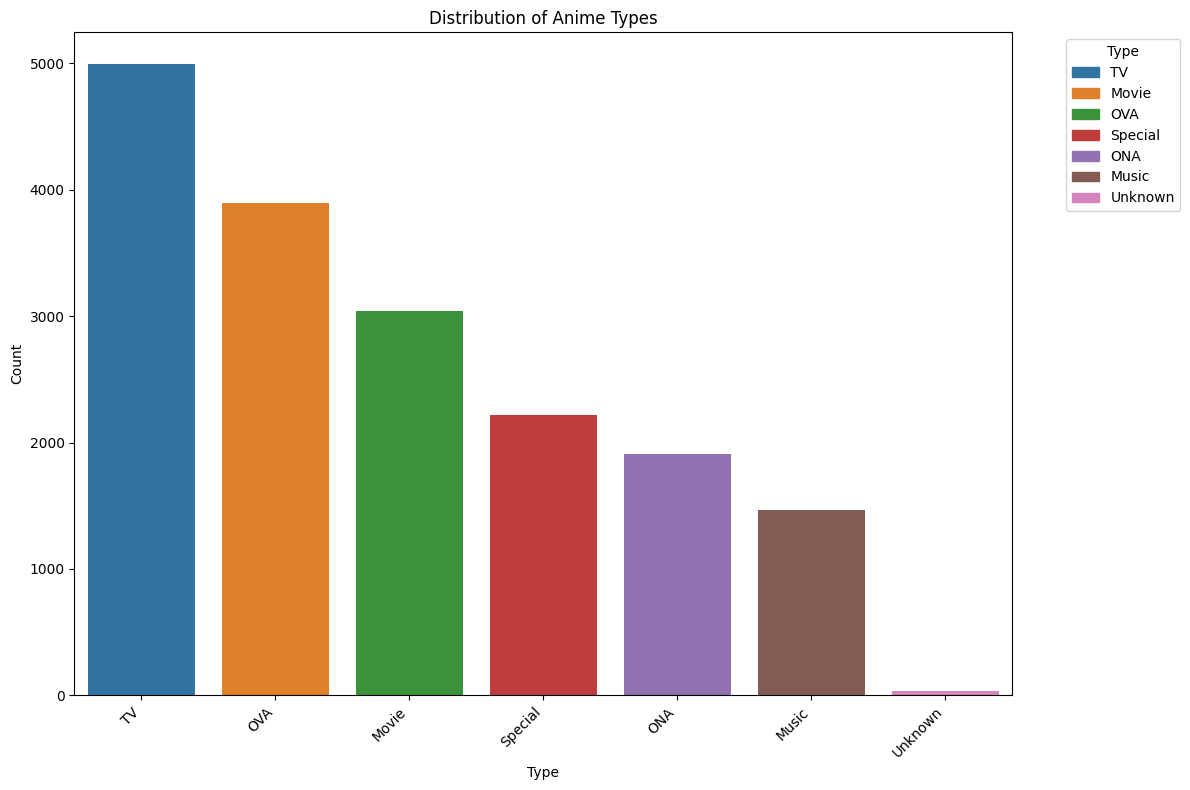

In [19]:
# Find the unique types and assign a color to each
unique_types = anime_stats_df['type'].dropna().unique()
palette = sns.color_palette('tab10', n_colors=len(unique_types))

# Plot the count by type
plt.figure(figsize=(12, 8))  # Adjusted for better fit of labels
type_countplot = sns.countplot(
    x='type',
    data=anime_stats_df,
    order=anime_stats_df['type'].value_counts().index,  # Order bars by count
    palette=palette  # Use the specified palette
)

# Set title and labels
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')

# Improve the x-axis labels readability
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right for better readability

# Get the colors of the bars currently in the plot for the legend
bars_colors = type_countplot.patches

# Create custom legend

legend_patches = [Patch(color=bar.get_facecolor(), label=label) for bar, label in zip(bars_colors, unique_types)]
plt.legend(handles=legend_patches, title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


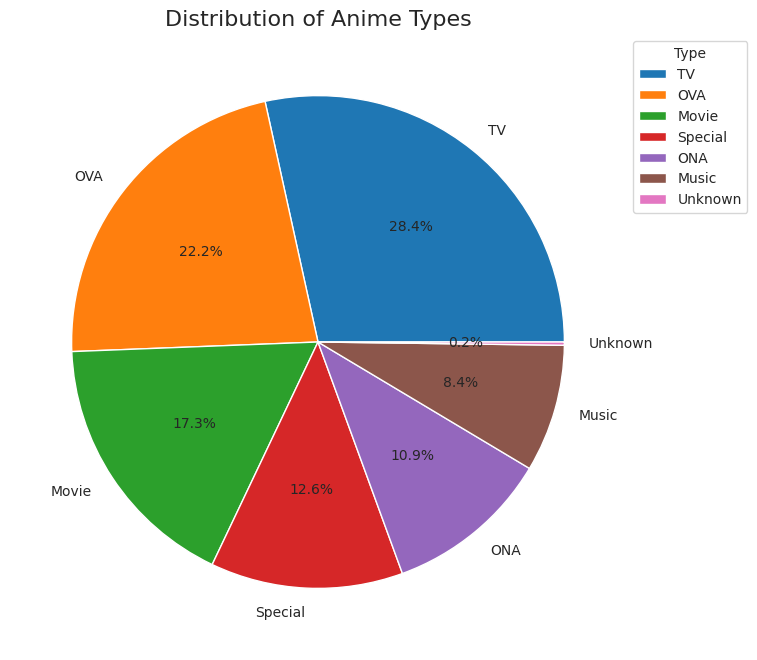

In [61]:
# Finding the unique types and the count of each type
type_counts = anime_stats_df['type'].value_counts()

# Define a color palette with a distinct color for each anime type
palette = sns.color_palette('tab10', n_colors=len(type_counts))

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=palette, startangle=0)

# Set title
plt.title('Distribution of Anime Types', fontsize=16)

# Create a legend
plt.legend(type_counts.index, title="Type", bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()


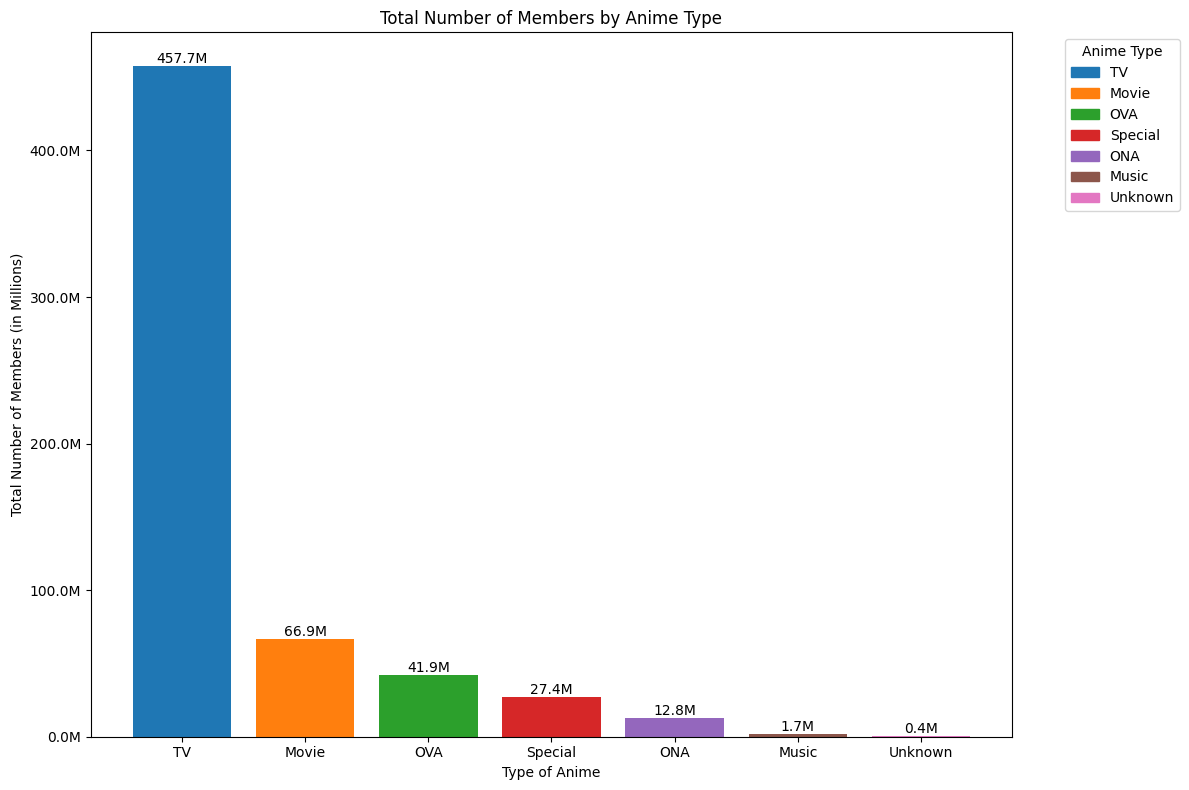

In [21]:


# Group and sort the total number of members by anime type
members_by_type_sorted = anime_stats_df.groupby('type')['members'].sum().sort_values(ascending=False)

# Define the same color palette used previously
palette = sns.color_palette('tab10', n_colors=len(members_by_type_sorted.index))

# Create the bar plot
plt.figure(figsize=(12, 8))
type_bars = plt.bar(members_by_type_sorted.index, members_by_type_sorted.values, color=palette)

# Format the y-axis to show numbers in millions (M)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/10**6:.1f}M'))

# Set the title and labels for the axes
plt.title('Total Number of Members by Anime Type')
plt.xlabel('Type of Anime')
plt.ylabel('Total Number of Members (in Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
# Annotate each bar with the number of members
for bar in type_bars:  # Assuming type_bars is the result of the bar plot
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height/10**6:.1f}M', ha='center', va='bottom')


# Extract the colors from the bars for the legend
colors = [bar.get_facecolor() for bar in type_bars]

# Create a custom legend

legend_patches = [Patch(color=colors[i], label=members_by_type_sorted.index[i]) for i in range(len(members_by_type_sorted.index))]
plt.legend(handles=legend_patches, title="Anime Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for readability
plt.tight_layout()

# Display the plot
plt.show()


In [22]:
# Split the 'genres' column into individual genres
genres_expanded = anime_stats_df['genres'].str.get_dummies(sep=', ')

# Multiply each genre by the 'members' column to weight by popularity
genres_weighted = genres_expanded.mul(anime_stats_df['members'], axis=0)

# Sum up the total members interested in each genre
genres_popularity = genres_weighted.sum().sort_values(ascending=False)

# Convert genres_popularity to DataFrame for easier handling
genres_popularity_df = genres_popularity.reset_index()
genres_popularity_df.columns = ['Genre', 'Total Members']

print(genres_popularity_df.head())

     Genre  Total Members
0   Comedy      284687458
1   Action      272659189
2    Drama      175776823
3  Shounen      173209859
4  Fantasy      171849449


In [23]:
genres_popularity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Genre          44 non-null     object
 1   Total Members  44 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 832.0+ bytes


In [24]:
genres_expanded.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
# Assuming 'genres' is a column with comma-separated genre labels
# We first split the genre strings by commas and then stack them into a single long series
genre_counts = anime_stats_df['genres'].str.split(', ').explode().value_counts()

# Display the most common genres
print(genre_counts)

genres
Comedy           6029
Action           3888
Fantasy          3285
Adventure        2957
Kids             2665
Drama            2619
Sci-Fi           2583
Music            2244
Shounen          2003
Slice of Life    1914
Romance          1899
School           1642
Supernatural     1479
Hentai           1348
Historical       1144
Mecha            1101
Magic            1081
Seinen            830
Ecchi             767
Mystery           727
Sports            713
Shoujo            688
Parody            660
Super Power       632
Military          576
Dementia          512
Demons            501
Space             495
Horror            462
Martial Arts      425
Harem             399
Game              386
Psychological     345
Police            247
Samurai           202
Vampire           136
Cars              133
Thriller          131
Shounen Ai        100
Josei              97
Shoujo Ai          79
Unknown            63
Yaoi               42
Yuri               32
Name: count, dtype: int64

<ipython-input-26-eb1481a9d4d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=genre_counts_df, x='Count', y='Genre', palette='viridis')


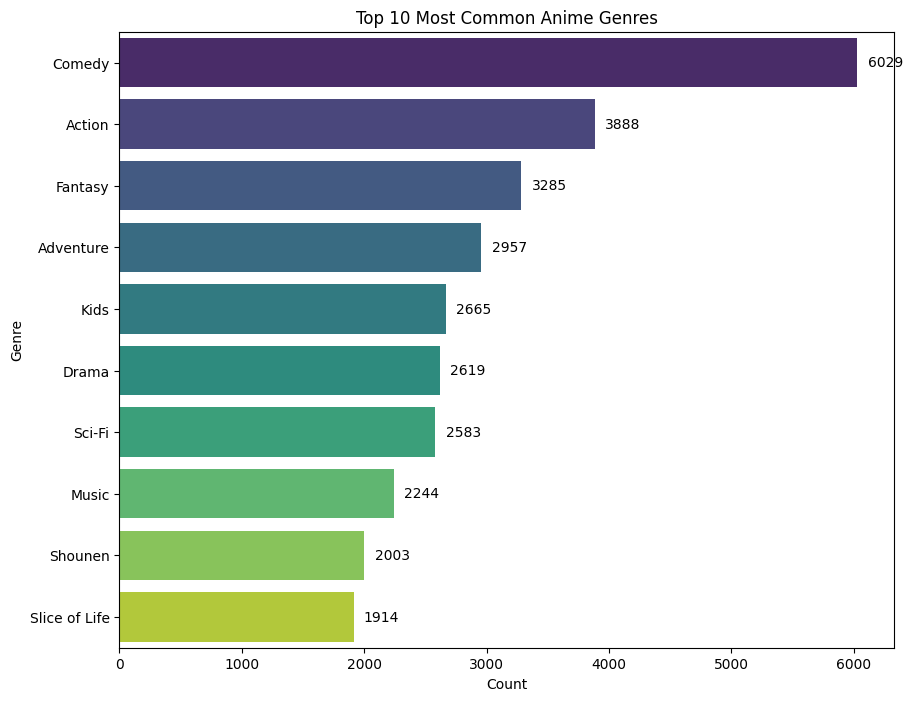

In [26]:
# Convert the Series to DataFrame for visualization
genre_counts_df = genre_counts.nlargest(10).reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# Plot the top 20 most common genres with annotations and colors
plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=genre_counts_df, x='Count', y='Genre', palette='viridis')

# Annotate each bar with the count value
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha = 'center', va = 'center',
                     size = 10, xytext = (20, 0),
                     textcoords = 'offset points')

plt.title('Top 10 Most Common Anime Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

<ipython-input-27-8a9445b790e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


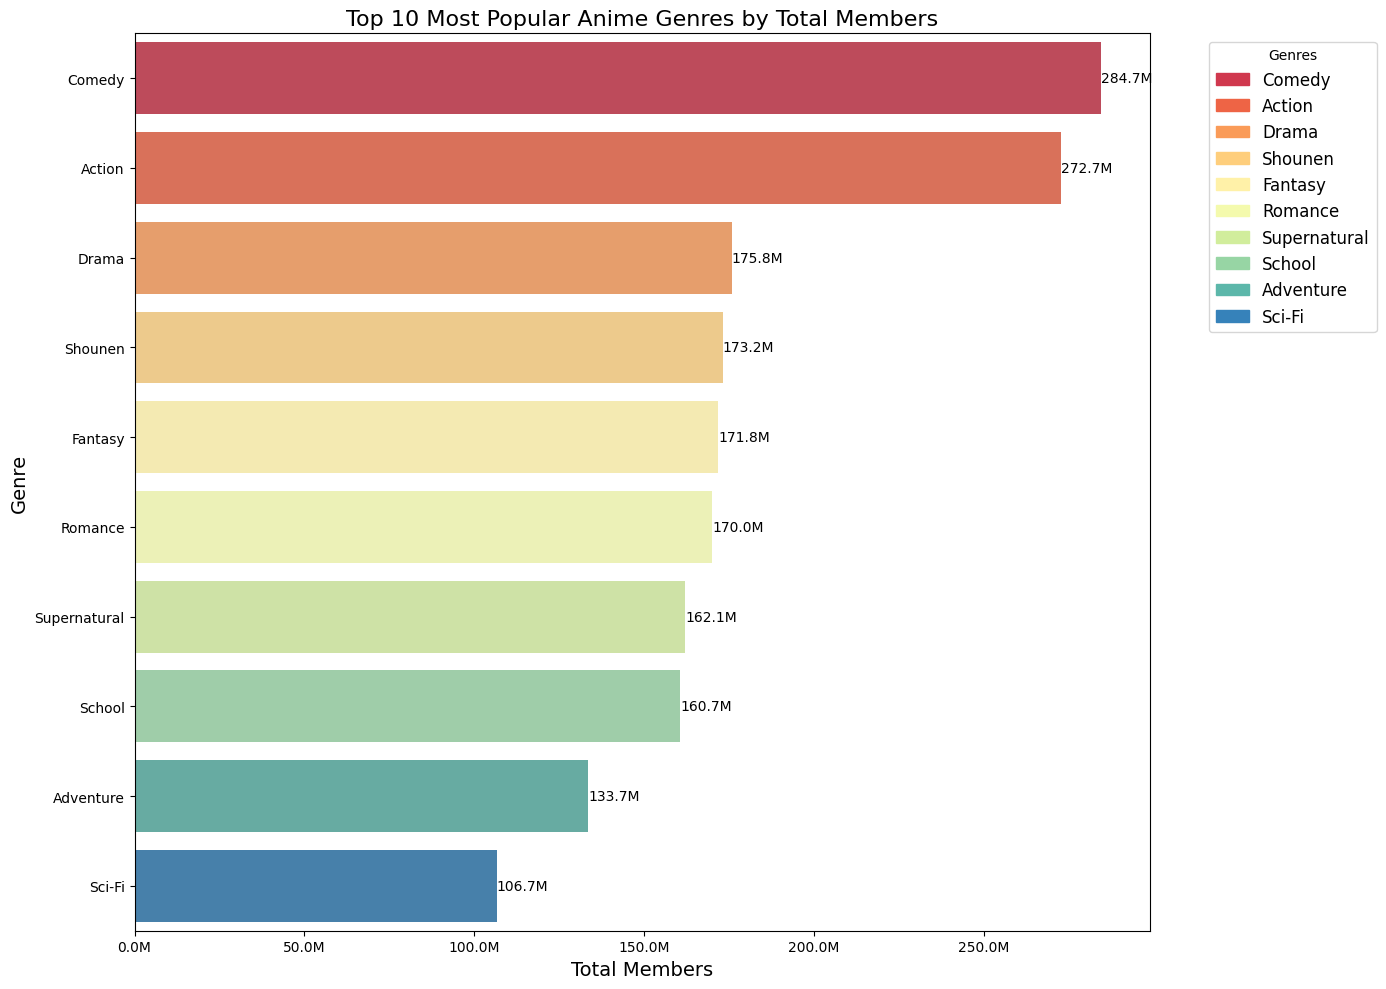

In [27]:


# Define a color palette with distinct, vibrant colors
vibrant_palette = sns.color_palette("Spectral", n_colors=genres_popularity_df.head(10).shape[0])

# Visualizing Top 10 Most Popular Anime Genres with Vibrant Colors
plt.figure(figsize=(14, 10))
barplot = sns.barplot(
    x='Total Members',
    y='Genre',
    data=genres_popularity_df.head(10),
    palette=vibrant_palette,  # Apply vibrant palette
    dodge=False
)

plt.title('Top 10 Most Popular Anime Genres by Total Members', fontsize=16)
plt.xlabel('Total Members', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/10**6:.1f}M'))  # Format x-axis labels as millions

# Annotate each bar with the number of members
for p in barplot.patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2,
             f'{p.get_width()/10**6:.1f}M',
             va='center', ha='left', fontsize=10, color='black')

# Extract the handles and labels for the custom legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in vibrant_palette]
labels = genres_popularity_df['Genre'].head(10).tolist()
plt.legend(handles, labels, title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()  # Adjust subplot parameters
plt.show()


In [28]:
# Sort the DataFrame by the 'members' column in descending order
sorted_by_members_df = anime_stats_df.sort_values(by='members', ascending=False)

# Select the top entries to display
top_watched_anime = sorted_by_members_df[['anime_id', 'name', 'members']].head(10)

print(top_watched_anime)

       anime_id                              name  members
1393       1535                        Death Note  2589552
7449      16498                Shingeki no Kyojin  2531397
3971       5114  Fullmetal Alchemist: Brotherhood  2248456
6614      11757                  Sword Art Online  2214395
10451     30276                     One Punch Man  2123866
11185     31964             Boku no Hero Academia  1909814
8646      22319                       Tokyo Ghoul  1895488
10           20                            Naruto  1830540
5683       9253                       Steins;Gate  1771162
8148      19815                   No Game No Life  1751054


<ipython-input-29-96a40a900c4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


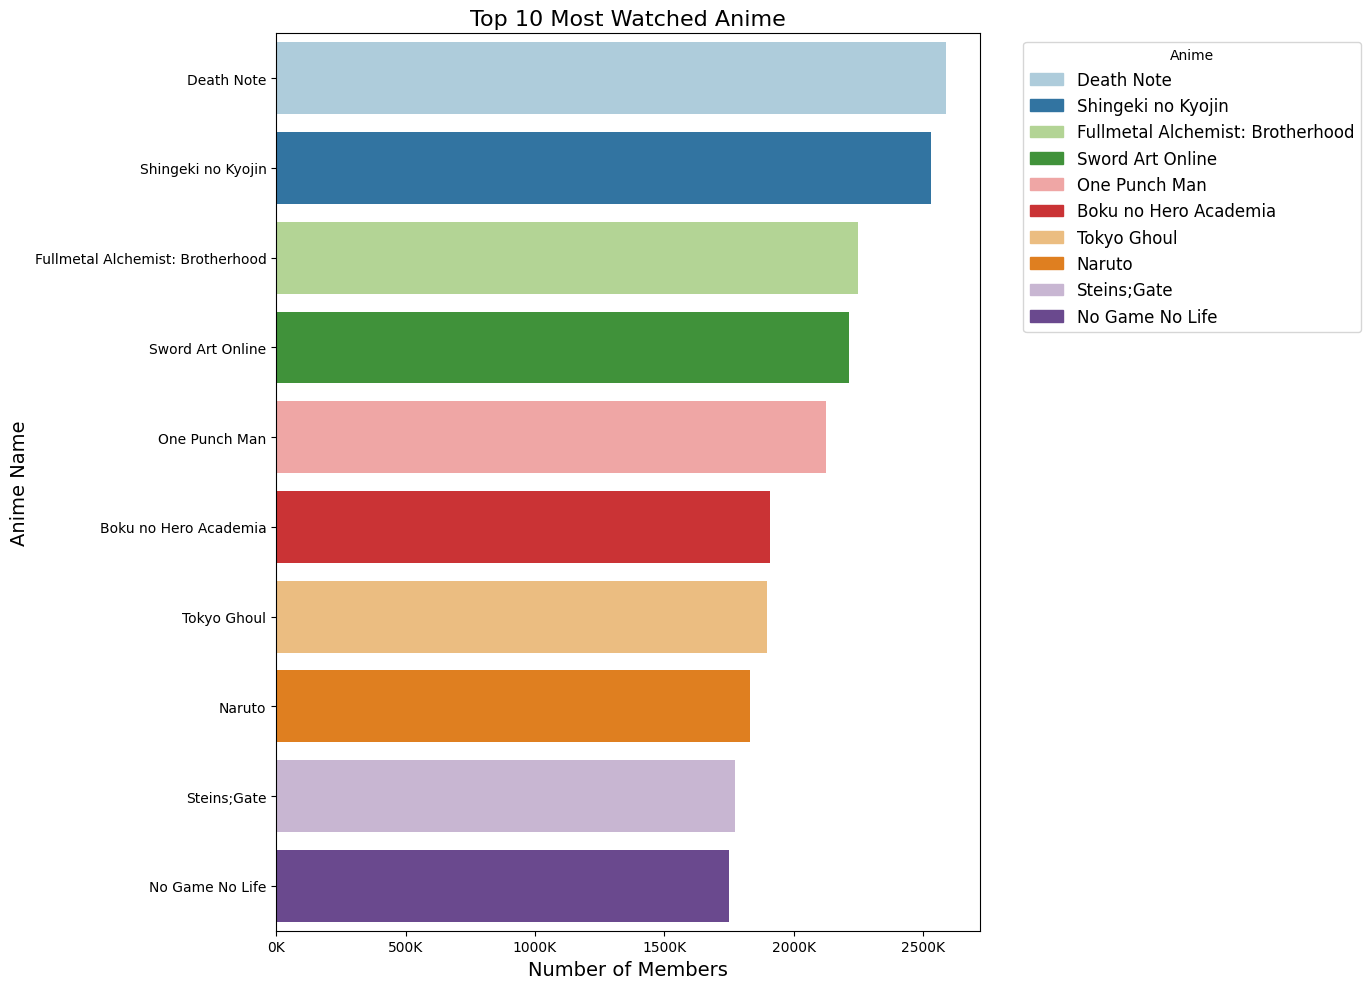

In [29]:
vibrant_palette = sns.color_palette("Paired", n_colors=top_watched_anime.shape[0])

# Create a bar plot for the top 10 most-watched anime with vibrant colors
plt.figure(figsize=(14, 10))
barplot = sns.barplot(
    x='members',
    y='name',
    data=top_watched_anime,
    palette=vibrant_palette
)

# Set the title and labels
plt.title('Top 10 Most Watched Anime', fontsize=16)
plt.xlabel('Number of Members', fontsize=14)
plt.ylabel('Anime Name', fontsize=14)

# Format the x-axis labels to 'K' for thousands
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Extract the colors used in the plot for the legend
handles = [plt.Rectangle((0,0),1,1, color=bar.get_facecolor()) for bar in barplot.patches]
labels = top_watched_anime['name'].tolist()

# Create the legend
plt.legend(handles, labels, title="Anime", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Adjust layout for better structure and readability
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
# Sort the DataFrame by 'avg_score' in descending order, and handle NaN values
sorted_by_score_df = anime_stats_df.dropna(subset=['avg_score']).sort_values(by='avg_score', ascending=False)

# Select the top entries to display
top_scored_anime = sorted_by_score_df[['anime_id', 'name', 'avg_score', 'members']].head(10)

print(top_scored_anime)

       anime_id                                  name  avg_score  members
3971       5114      Fullmetal Alchemist: Brotherhood       9.19  2248456
15926     40028  Shingeki no Kyojin: The Final Season       9.17   733260
5683       9253                           Steins;Gate       9.11  1771162
14963     38524    Shingeki no Kyojin Season 3 Part 2       9.10  1073626
9913      28977                              Gintama°       9.10   404121
6474      11061                Hunter x Hunter (2011)       9.10  1673924
6006       9969                              Gintama'       9.08   365579
741         820                  Ginga Eiyuu Densetsu       9.07   230168
7261      15417                   Gintama': Enchousen       9.04   222819
12898     35180            3-gatsu no Lion 2nd Season       9.00   266243


<ipython-input-31-abbc99466077>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


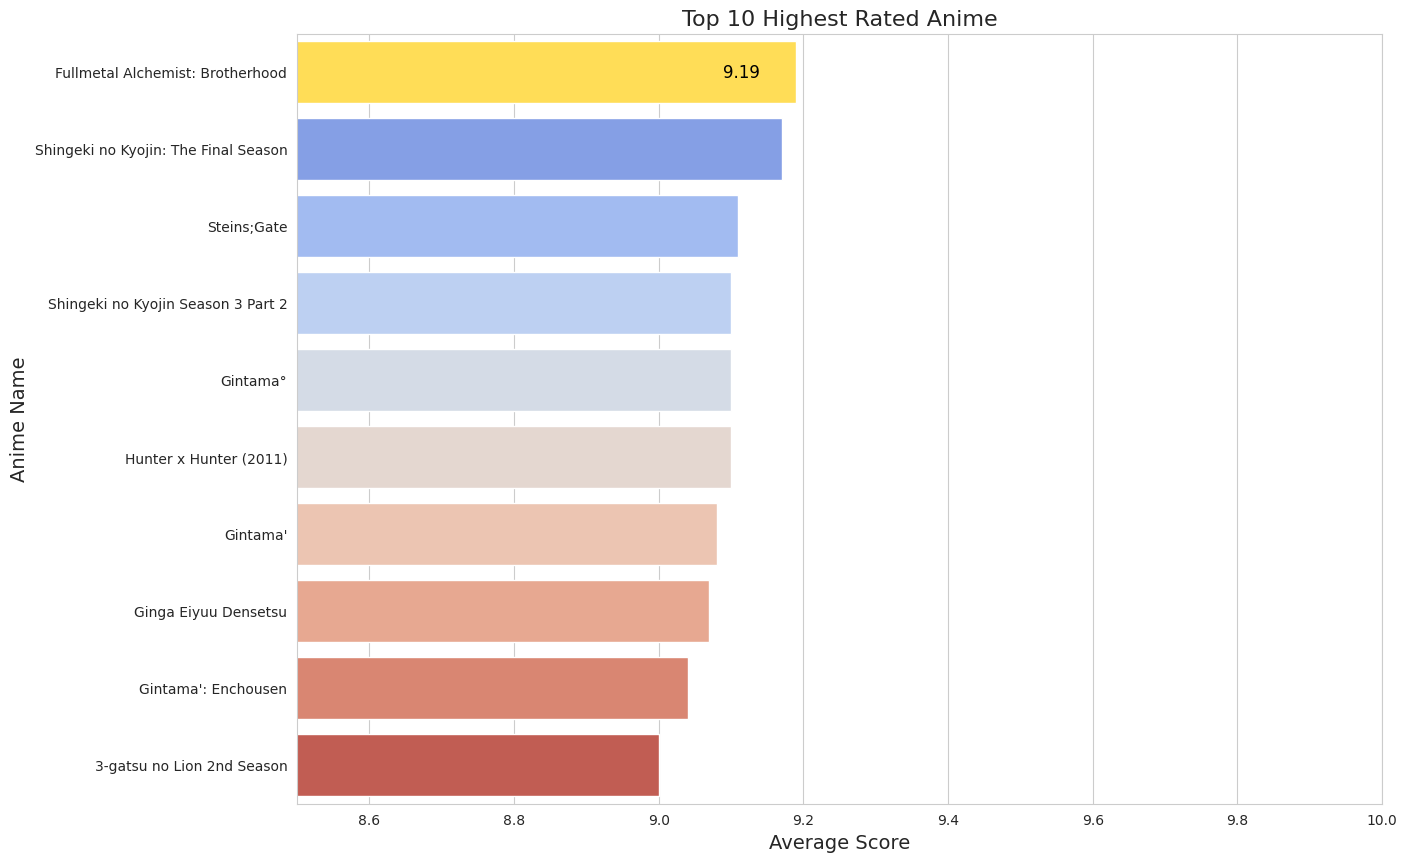

In [31]:
# Assuming 'top_scored_anime' is already defined and sorted by 'avg_score'
# Set the style for aesthetic enhancement
sns.set_style("whitegrid")

palette = sns.color_palette("coolwarm", n_colors=top_scored_anime.shape[0])
highlight = sns.color_palette(["#ffdd57"], n_colors=1)

# Initialize the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot the average scores with the color palette
barplot = sns.barplot(
    x="avg_score",
    y="name",
    data=top_scored_anime,
    palette=palette
)

# Highlight the top-rated anime with the standout color
barplot.patches[0].set_facecolor(highlight[0])

# Set the title and labels
plt.title("Top 10 Highest Rated Anime", fontsize=16)
plt.xlabel("Average Score", fontsize=14)
plt.ylabel("Anime Name", fontsize=14)

# Set the x-axis limits to start from 8 to focus on top ratings
plt.xlim(8.5, 10)

# Annotate the top average score on the graph
top_avg_score = top_scored_anime.iloc[0]["avg_score"]
top_anime_name = top_scored_anime.iloc[0]["name"]
plt.text(top_avg_score - 0.05,  # x position (shifted slightly left for aesthetics)
         0,                      # y position (at the first/top bar)
         f"{top_avg_score:.2f}",  # text label
         va="center",             # center vertically
         ha="right",              # align right
         fontsize=12,             # font size
         color="black")           # text color

# Show the plot
plt.show()


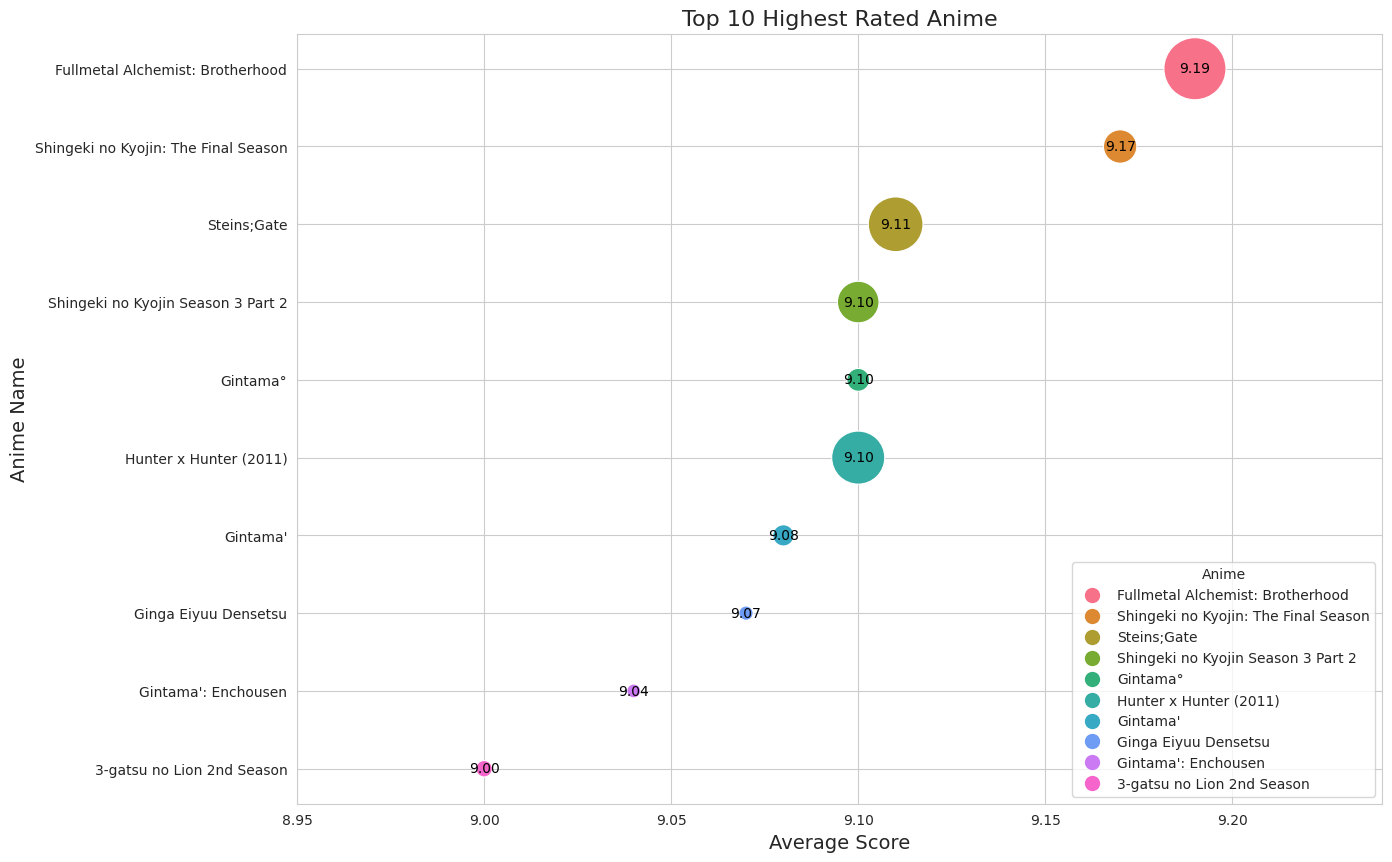

In [32]:

# Set the style for aesthetic enhancement
sns.set_style("whitegrid")

# Generate a color palette with a distinct color for each anime
palette = sns.color_palette("husl", n_colors=top_scored_anime.shape[0])

# Create a scatter plot (bubble chart) with members as the size of the bubble
plt.figure(figsize=(14, 10))
bubble_chart = sns.scatterplot(
    data=top_scored_anime,
    x="avg_score",
    y="name",
    size="members",
    hue="name",
    palette=palette,
    sizes=(100, 2000),  # Adjust size range as needed
    legend=False  # We will add a custom legend
)

# Annotate each bubble with the score
for index, row in top_scored_anime.iterrows():
    plt.text(
        row['avg_score'],  # x-coordinate position
        row['name'],       # y-coordinate position
        s=f"{row['avg_score']:.2f}",  # Text to display
        color="black",     # Text color
        va='center',       # Vertical alignment
        ha='center',       # Horizontal alignment
        fontsize=10        # Font size
    )

# Set the title and labels
plt.title("Top 10 Highest Rated Anime", fontsize=16)
plt.xlabel("Average Score", fontsize=14)
plt.ylabel("Anime Name", fontsize=14)

# Adjust the limits of the x-axis to give some space for the annotations
plt.xlim(top_scored_anime['avg_score'].min() - 0.05, top_scored_anime['avg_score'].max() + 0.05)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color=palette[i], linestyle='', markersize=10)
           for i in range(len(top_scored_anime))]
labels = top_scored_anime['name'].tolist()
plt.legend(handles, labels, loc="lower right", title="Anime")

# Show the plot
plt.show()


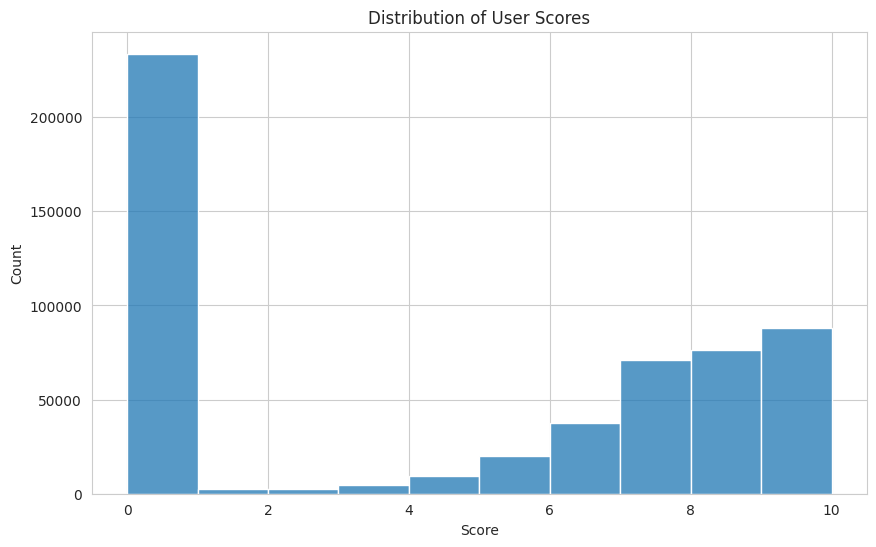

In [33]:
# Plot the distribution of user scores
plt.figure(figsize=(10, 6))
sns.histplot(user_stats_df['score'], bins=10, kde=False)
plt.title('Distribution of User Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


<ipython-input-34-56f27dbe40d8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_bar = sns.countplot(x='watching_status', data=user_stats_df, palette=status_colors)


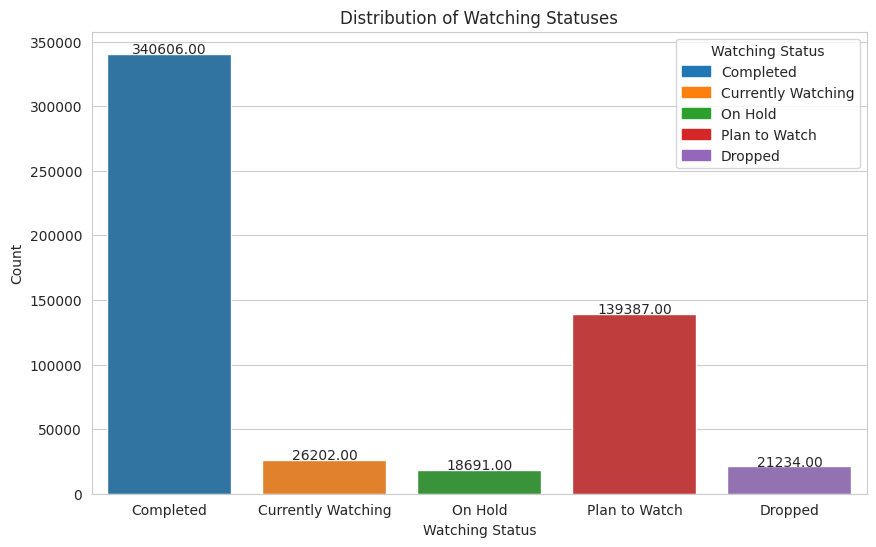

In [34]:

# Define a palette manually or use a seaborn palette
palette = sns.color_palette("tab10", user_stats_df['watching_status'].nunique())

# Create a mapping of watching status to colors
status_colors = {status: color for status, color in zip(user_stats_df['watching_status'].unique(), palette)}

# Plot the countplot with specified colors
plt.figure(figsize=(10, 6))
sns_bar = sns.countplot(x='watching_status', data=user_stats_df, palette=status_colors)
plt.title('Distribution of Watching Statuses')
plt.xlabel('Watching Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add the value annotations on top of each bar
for p in sns_bar.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}'.format(height), ha="center")

# Create custom legend
legend_patches = [Patch(color=color, label=status) for status, color in status_colors.items()]
plt.legend(handles=legend_patches, title="Watching Status")

plt.show()

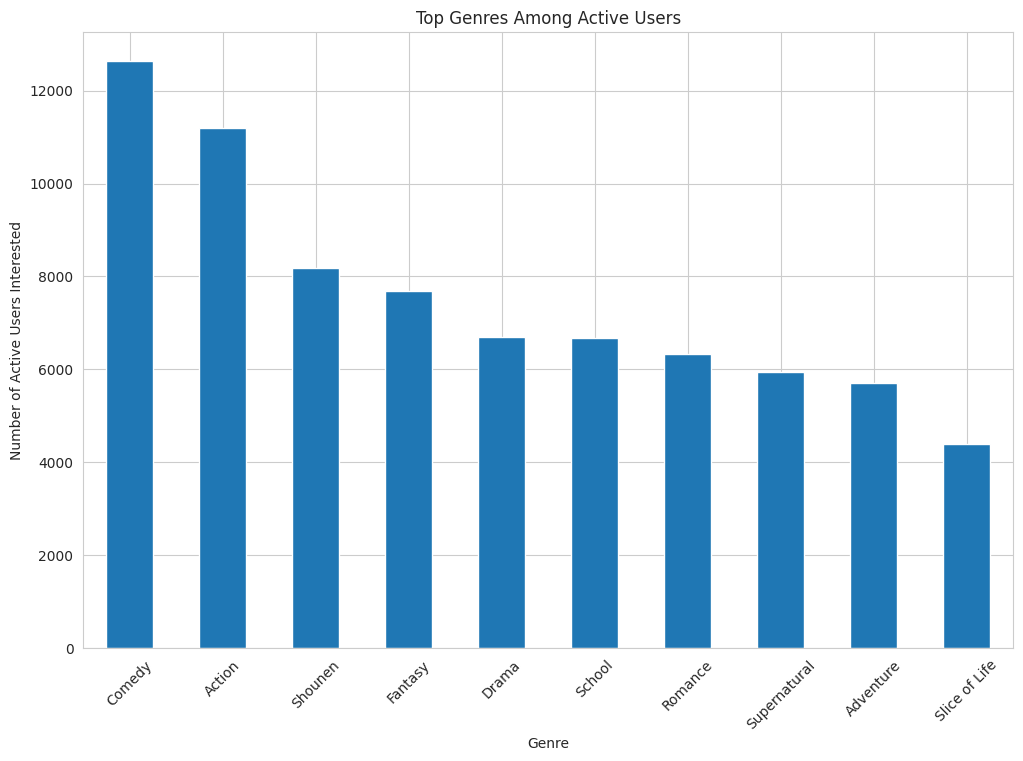

In [35]:
# Identify active users as those currently watching an anime
active_users = user_stats_df[user_stats_df['watching_status'].str.contains('Watching', na=False)]

# Find their favorite genres
active_user_genres = active_users.merge(anime_stats_df, on='anime_id', how='left')['genres'].str.get_dummies(sep=', ').sum()

# Plot the top genres among active users
active_user_genres = active_user_genres.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
active_user_genres.plot(kind='bar')
plt.title('Top Genres Among Active Users')
plt.xlabel('Genre')
plt.ylabel('Number of Active Users Interested')
plt.xticks(rotation=45)
plt.show()


In [36]:
anime_stats_df.columns

Index(['anime_id', 'name', 'avg_score', 'genres', 'english name',
       'japanese name', 'type', 'episodes', 'aired', 'premiered', 'producers',
       'licensors', 'studios', 'source', 'duration', 'age_rating', 'ranked',
       'popularity', 'members', 'favorites', 'watching', 'completed',
       'on-hold', 'dropped', 'plan to watch', 'score-10', 'score-9', 'score-8',
       'score-7', 'score-6', 'score-5', 'score-4', 'score-3', 'score-2',
       'score-1', 'genres_encoded'],
      dtype='object')

#XGboost for Analyzing Viewership and Ratings

In [37]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# features and target variable
X = anime_stats_df[['genres_encoded', 'members', 'watching', 'completed', 'favorites', 'on-hold', 'dropped', 'plan to watch']]  # example features
y = anime_stats_df['avg_score']  # target variable

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 100, subsample=0.8, random_state=42)

# Fit the model
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred_train = xg_reg.predict(X_train)
y_pred_test = xg_reg.predict(X_test)


In [41]:
# Calculate RMSE and R²
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Training R²: {train_r2}, Test R²: {test_r2}")


Training RMSE: 0.6281690242762279, Test RMSE: 0.6942542962564133
Training R²: 0.9578598877033799, Test R²: 0.9475791158590501


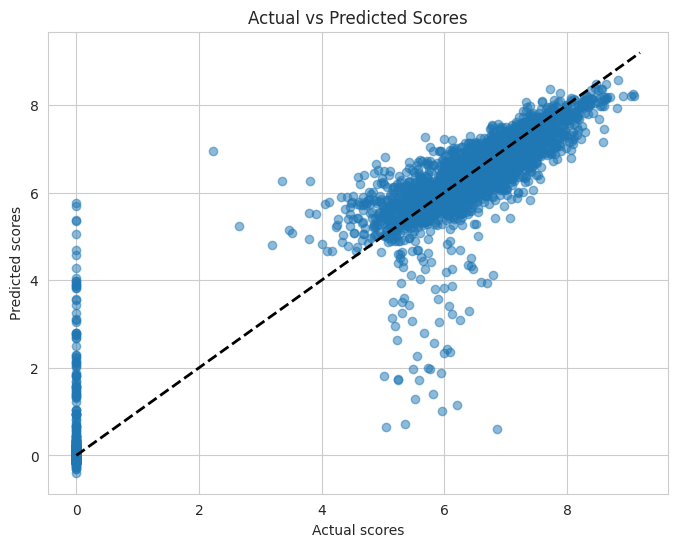

In [42]:
# Scatter plot for actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line representing perfect predictions
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual scores')
plt.ylabel('Predicted scores')
plt.show()


In [43]:
# Print the number of instances available in the test set
print(f"Number of instances in the test set: {X_test.shape[0]}")

Number of instances in the test set: 3513


In [44]:

# Selecting a single example from the test set
example_index = 31  # For instance, select the 10th row in the test set
single_example = X_test.iloc[[example_index]]

# Making prediction for the selected example
predicted_score = xg_reg.predict(single_example)

# Actual score
actual_score = y_test.iloc[example_index]

print(f"Predicted score: {predicted_score[0]}")
print(f"Actual score: {actual_score}")


Predicted score: 5.9583258628845215
Actual score: 6.55


<Figure size 9000x9000 with 0 Axes>

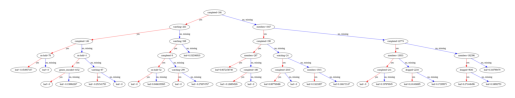

In [45]:
# Set large figure size and high DPI for better readability
plt.figure(figsize=(30, 30), dpi=300)

# Assuming xg_reg is your trained XGBoost model
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()


<ipython-input-46-5ca38560d431>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


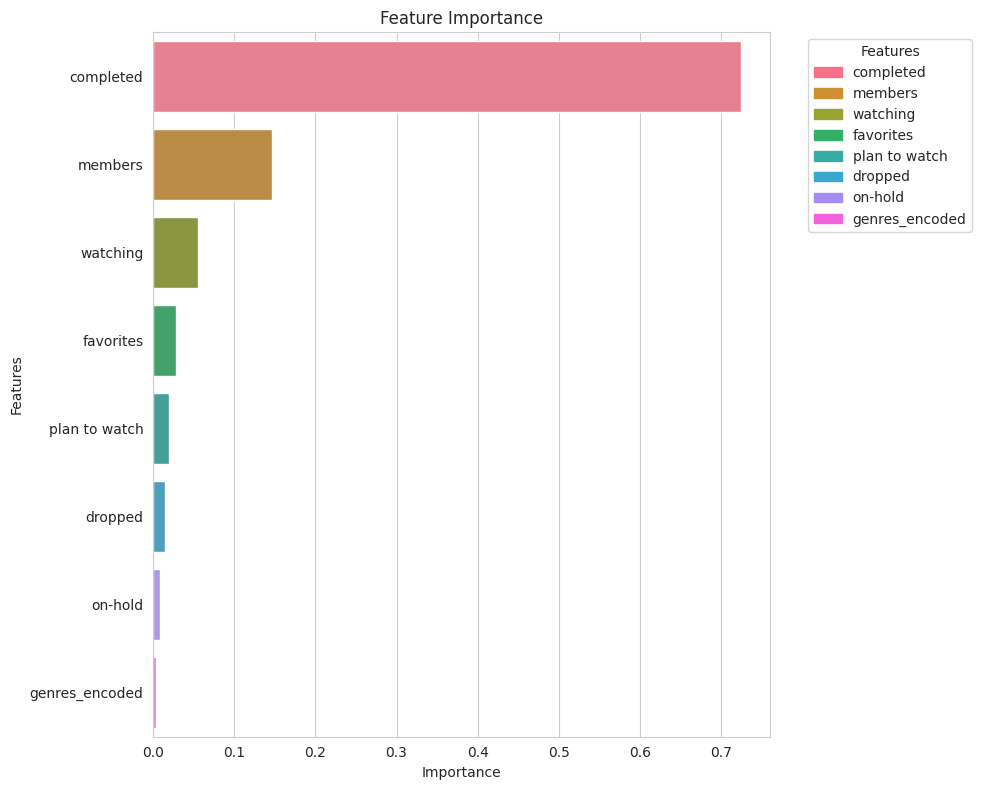

In [46]:
import matplotlib.patches as mpatches

# Assuming X_train.columns and xg_reg.feature_importances_ are defined as in your setup
feature_importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': xg_reg.feature_importances_
})

# Sort the DataFrame by the importance score in descending order
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Create a color palette that is as long as the number of features
palette = sns.color_palette("husl", len(feature_importances))

# Create the bar plot with a seaborn color palette
plt.figure(figsize=(10, 8))
sns.barplot(
    y='Features',
    x='Importance',
    data=feature_importances,
    palette=palette
)

# Create a list of patches using the colors from the palette
patches = [mpatches.Patch(color=palette[i], label=feature_importances['Features'].iloc[i]) for i in range(len(feature_importances))]

# Add the legend to the plot
plt.legend(handles=patches, title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the plot title and labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plot
plt.show()

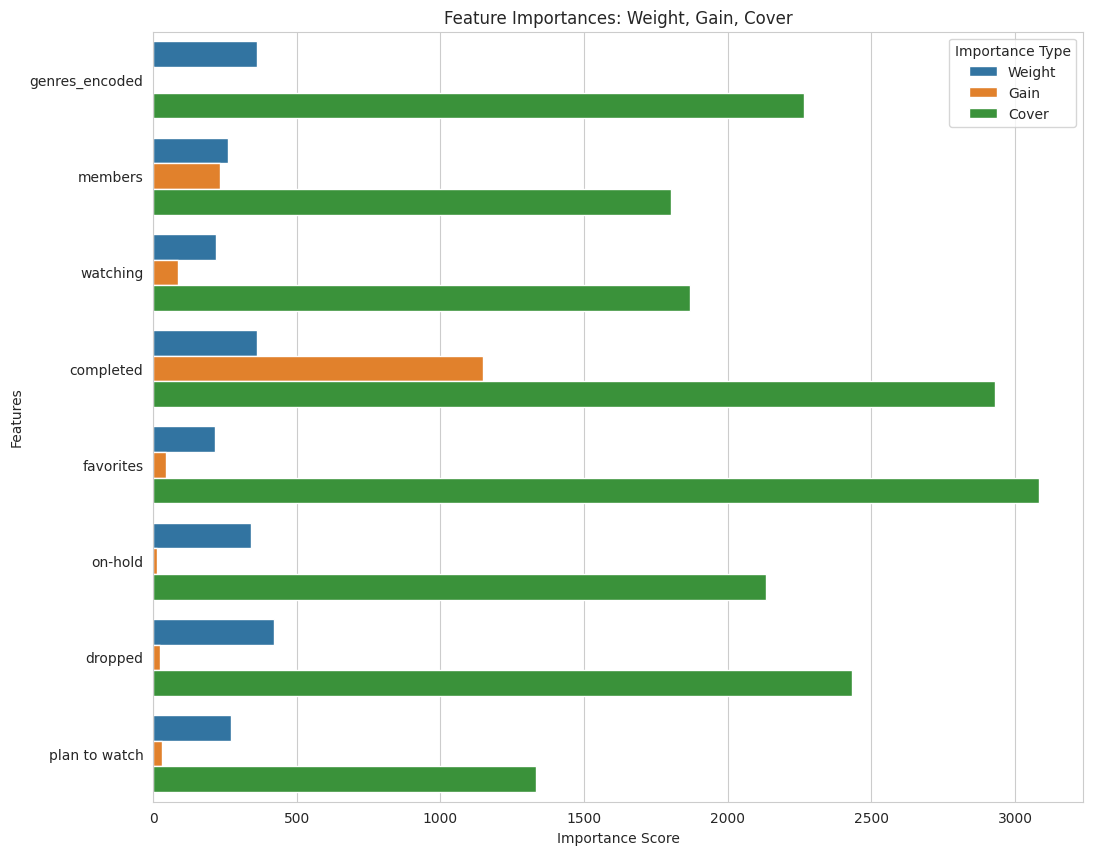

In [47]:

# Assuming xg_reg is your trained XGBoost model and X_train is your training data
feature_names = X_train.columns

# Extracting different types of feature importances
importance_weight = xg_reg.get_booster().get_score(importance_type='weight')
importance_gain = xg_reg.get_booster().get_score(importance_type='gain')
importance_cover = xg_reg.get_booster().get_score(importance_type='cover')

# Normalizing the importances by converting them to DataFrames and then filling missing values
df_weight = pd.DataFrame(importance_weight.items(), columns=['Features', 'Weight']).set_index('Features')
df_gain = pd.DataFrame(importance_gain.items(), columns=['Features', 'Gain']).set_index('Features')
df_cover = pd.DataFrame(importance_cover.items(), columns=['Features', 'Cover']).set_index('Features')

# Combining all importances into one DataFrame
df_importances = pd.concat([df_weight, df_gain, df_cover], axis=1).fillna(0)

# Reset index to get Features column
df_importances.reset_index(inplace=True)

# Melting the DataFrame to have a long format suitable for sns.barplot
df_melted = df_importances.melt(id_vars="Features", var_name="ImportanceType", value_name="Importance")

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Features', hue='ImportanceType', data=df_melted)

# Enhancements for readability
plt.title('Feature Importances: Weight, Gain, Cover')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.legend(title='Importance Type')

plt.show()

In [48]:

# identify the threshold for "most highly completed" and "most dropped"
completed_threshold = anime_stats_df['completed'].quantile(0.90)  # Adjust quantile as needed
dropped_threshold = anime_stats_df['dropped'].quantile(0.90)  # Adjust quantile as needed

# Filter DataFrames based on these thresholds
most_completed_anime = anime_stats_df[anime_stats_df['completed'] >= completed_threshold]
most_dropped_anime = anime_stats_df[anime_stats_df['dropped'] >= dropped_threshold]

# Aggregate genres for both filtered DataFrames
def aggregate_genres(df):
    return df['genres'].str.split(', ').explode().value_counts().head(10)  # Adjust as needed for top N genres

# Aggregating genres
top_genres_completed = aggregate_genres(most_completed_anime)
top_genres_dropped = aggregate_genres(most_dropped_anime)


<ipython-input-49-a321ca358c03>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_completed.values, y=top_genres_completed.index, palette='viridis')


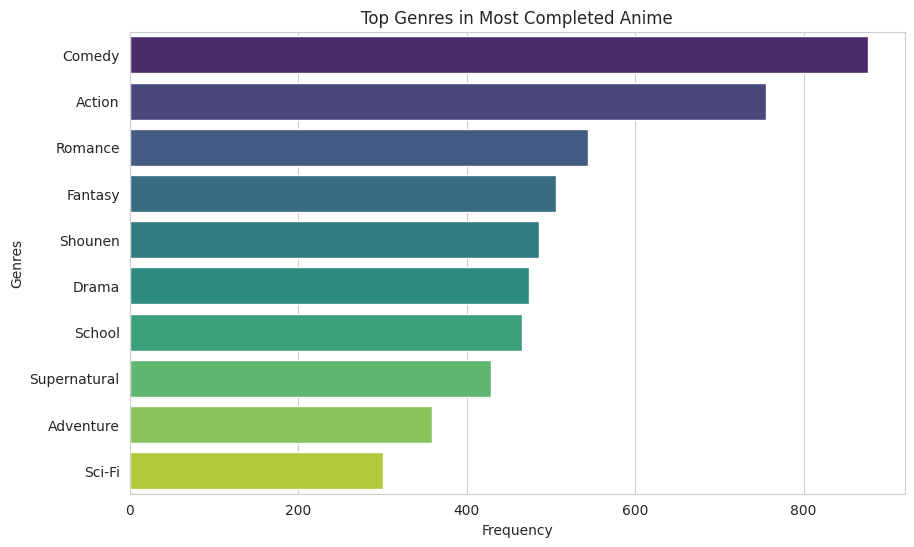

In [49]:
# Visualization for top genres in most completed anime
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_completed.values, y=top_genres_completed.index, palette='viridis')
plt.title('Top Genres in Most Completed Anime')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.show()


<ipython-input-50-09c96df28171>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_dropped.values, y=top_genres_dropped.index, palette='viridis')


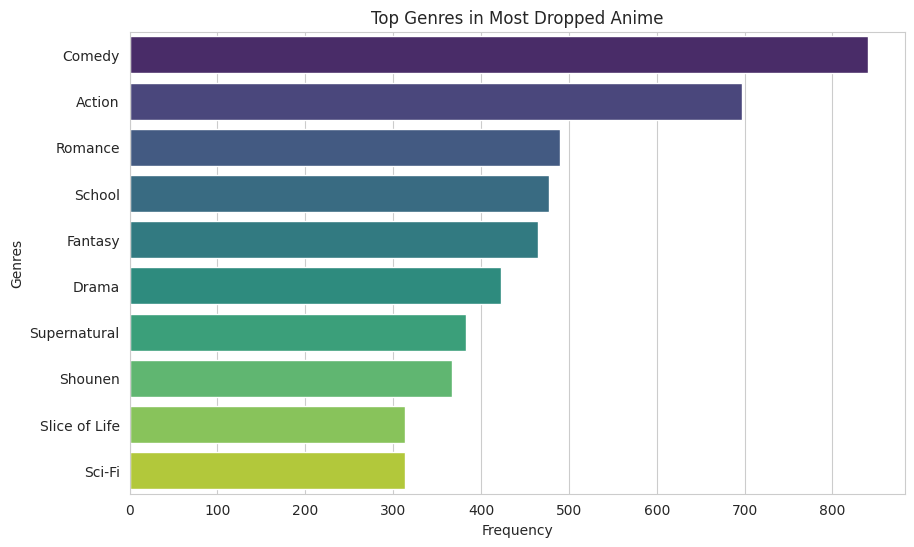

In [50]:
# Visualization for top genres in most dropped anime
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_dropped.values, y=top_genres_dropped.index, palette='viridis')
plt.title('Top Genres in Most Dropped Anime')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.show()


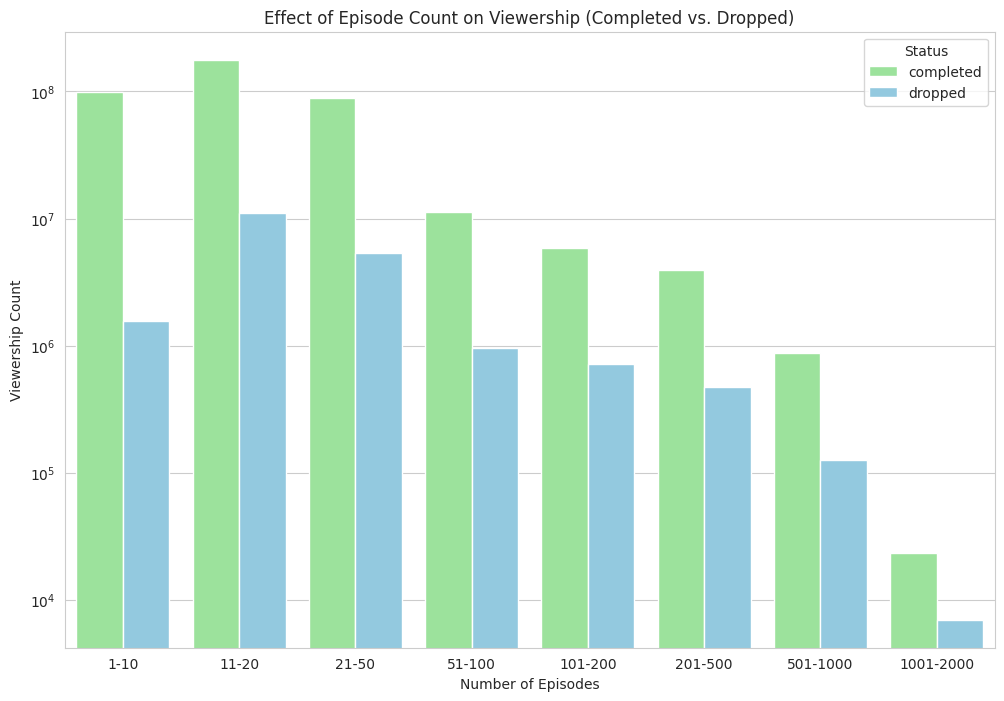

In [51]:
# Define episode bins and labels for them
bins = [0, 10, 20, 50, 100, 200, 500, 1000, 2000]
labels = ['1-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-2000']

# Categorize 'episodes' into bins
anime_stats_df['episode_bins'] = pd.cut(anime_stats_df['episodes'], bins=bins, labels=labels, right=False)

# Aggregate completed and dropped counts by episode bins
aggregated_by_bins = anime_stats_df.groupby('episode_bins').agg({
    'completed': 'sum',
    'dropped': 'sum'
}).reset_index()

# Convert to 'long' format for easier plotting with seaborn
aggregated_long = pd.melt(aggregated_by_bins, id_vars=['episode_bins'], value_vars=['completed', 'dropped'],
                          var_name='Status', value_name='Count')

# Plotting

plt.figure(figsize=(12, 8))
sns.barplot(x='episode_bins', y='Count', hue='Status', data=aggregated_long, palette=['lightgreen', 'skyblue'])

plt.title('Effect of Episode Count on Viewership (Completed vs. Dropped)')
plt.xlabel('Number of Episodes')
plt.ylabel('Viewership Count')
plt.yscale('log')  # Optional: Use a logarithmic scale for the y-axis to manage wide value ranges

plt.show()


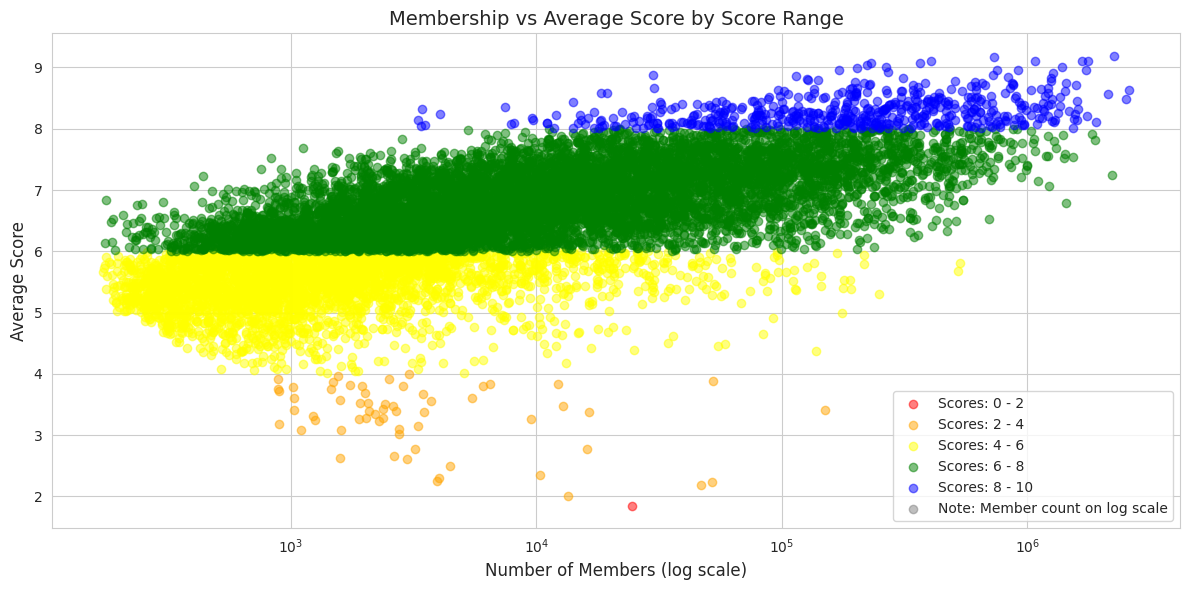

In [52]:
# Scatter plot between 'members' and 'avg_score' with different colors for different score ranges
plt.figure(figsize=(12, 6))

# Define score ranges and colors
score_ranges = [(0, 2, 'red'), (2, 4, 'orange'), (4, 6, 'yellow'), (6, 8, 'green'), (8, 10, 'blue')]
for lower, upper, color in score_ranges:
    subset = anime_stats_df[(anime_stats_df['avg_score'] > lower) & (anime_stats_df['avg_score'] <= upper)]
    plt.scatter(subset['members'], subset['avg_score'], c=color, label=f"Scores: {lower} - {upper}", alpha=0.5)

# Adding a note in the legend about the logarithmic scale
plt.scatter([], [], c='gray', alpha=0.5, label='Note: Member count on log scale')

# Formatting the plot
plt.title('Membership vs Average Score by Score Range', fontsize=14)
plt.xlabel('Number of Members (log scale)', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xscale('log')  # Using a logarithmic scale for 'members'
plt.yscale('linear')  # Ensuring a linear scale for 'avg_score'
plt.legend()  # Display the legend
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


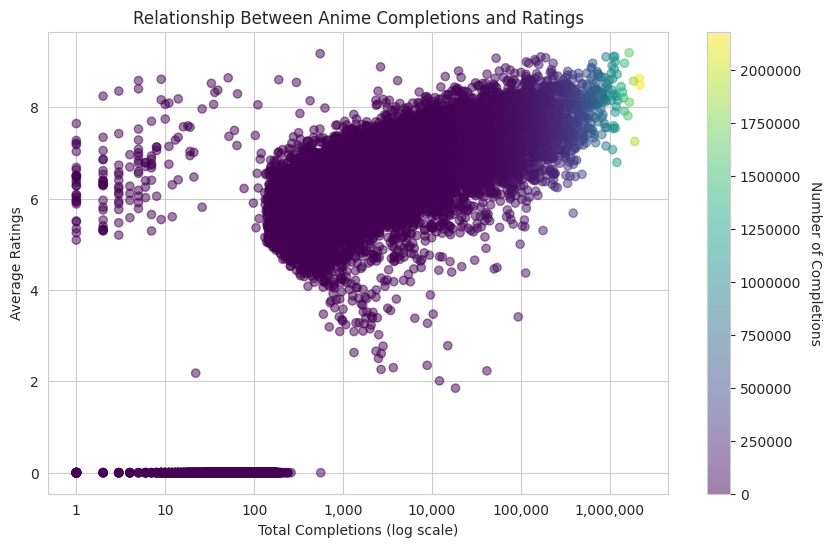

In [73]:
# Preparing the data
x = anime_stats_df['completed']
y = anime_stats_df['avg_score']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Normalize the 'completed' data for color mapping
norm = plt.Normalize(x.min(), x.max())

# Create a scatter plot with a colormap
sc = ax.scatter(x, y, c=x, cmap='viridis', alpha=0.5, norm=norm)

# Add a colorbar to the plot with clear labels
cbar = plt.colorbar(sc, ax=ax, format="%d")
cbar.set_label('Number of Completions', rotation=270, labelpad=15)

# Set the title and labels with simple language
ax.set_title('Relationship Between Anime Completions and Ratings')
ax.set_xlabel('Total Completions (log scale)')
ax.set_ylabel('Average Ratings')

# Set the scale of x-axis to logarithmic to handle wide range data and explain it
ax.set_xscale('log')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.grid(True)

# Display the plot
plt.show()


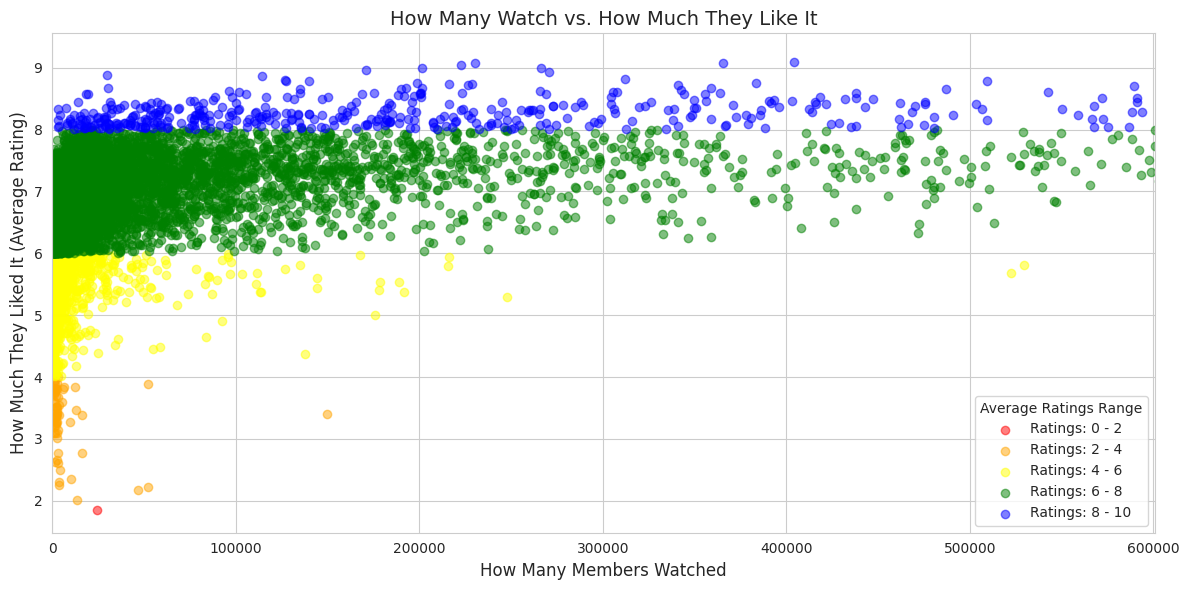

In [74]:
import matplotlib.pyplot as plt

# Define score ranges and colors
score_ranges = [(0, 2, 'red'), (2, 4, 'orange'), (4, 6, 'yellow'), (6, 8, 'green'), (8, 10, 'blue')]

# Start the figure
plt.figure(figsize=(12, 6))

# Create scatter plots for each score range
for lower, upper, color in score_ranges:
    subset = anime_stats_df[(anime_stats_df['avg_score'] > lower) & (anime_stats_df['avg_score'] <= upper)]
    plt.scatter(subset['members'], subset['avg_score'], c=color, label=f"Ratings: {lower} - {upper}", alpha=0.5)

# Title and labels with simpler terms
plt.title('How Many Watch vs. How Much They Like It', fontsize=14)
plt.xlabel('How Many Members Watched', fontsize=12)
plt.ylabel('How Much They Liked It (Average Rating)', fontsize=12)

# Set scale to linear and define a sensible limit for clarity
plt.xlim(0, anime_stats_df['members'].quantile(0.99))  # Show up to the 99th percentile to avoid extreme values

# Display the legend
plt.legend(title='Average Ratings Range')

# Grid and layout adjustment for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


#Content-Based Filtering


In [53]:
# Numberical features 'genres_encoded', 'members', 'watching', 'completed', 'Favorites', 'On-Hold', 'Dropped', 'Plan to Watch'
numeric_features_df = anime_stats_df[[ 'genres_encoded','members', 'watching', 'completed', 'favorites', 'on-hold', 'dropped', 'plan to watch']]

# Calculate cosine similarity matrix on the selected numeric features
cosine_sim = cosine_similarity(numeric_features_df, numeric_features_df)

# Mapping anime titles to DataFrame indices
indices = pd.Series(anime_stats_df.index, index=anime_stats_df['name']).drop_duplicates()

# Function to get recommendations based on cosine similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return "Title not found in dataset"
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 similar items
    anime_indices = [i[0] for i in sim_scores]
    return anime_stats_df['name'].iloc[anime_indices]

In [54]:
# Example usage (make sure to replace 'Your Anime Title Here' with an actual title)
print(get_recommendations('Dragon Ball'))

8551                                  Sword Art Online II
4426                                      Dragon Ball Kai
9011                                    Nanatsu no Taizai
1393                                           Death Note
8349    JoJo no Kimyou na Bouken Part 3: Stardust Crus...
1421                              Pokemon Diamond & Pearl
8646                                          Tokyo Ghoul
1974                              Bakugan Battle Brawlers
1420                          Pokemon Advanced Generation
515                                             Yu☆Gi☆Oh!
Name: name, dtype: object


In [55]:
# Input prompt for the user
'''title_to_search = input("Enter the anime title you're interested in: ").strip()
recommendations = get_recommendations(title_to_search)

if isinstance(recommendations, list):
    print("\nTop 10 recommended anime based on your interest:")
    for i, title in enumerate(recommendations, 1):
        print(f"{i}. {title}")
else:
    print(recommendations)'''

'title_to_search = input("Enter the anime title you\'re interested in: ").strip()\nrecommendations = get_recommendations(title_to_search)\n\nif isinstance(recommendations, list):\n    print("\nTop 10 recommended anime based on your interest:")\n    for i, title in enumerate(recommendations, 1):\n        print(f"{i}. {title}")\nelse:\n    print(recommendations)'

In [56]:
user_stats_df.head()

,Unnamed: 0,user_id,anime_id,score,watching_status,watched_episodes
0,103975409,336145,2251,10,Completed,13
1,106163638,343247,2787,9,Completed,24
2,40226351,130592,235,9,Currently Watching,752
3,11770069,38258,10572,0,On Hold,1
4,60530240,196188,22729,8,Completed,12


In [66]:
def user_recommendations(user_id, cosine_sim=cosine_sim, user_list_df=user_stats_df, anime_stats_df=anime_stats_df):
    # Ensure anime_id_to_index is correctly set up to map anime_id to indices in anime_stats_df
    anime_id_to_index = pd.Series(index=anime_stats_df['anime_id'], data=anime_stats_df.index).to_dict()

    # Filter user data for the given user_id
    user_data = user_list_df[user_list_df['user_id'] == user_id]

    # Get the anime_ids of the top-rated or frequently watched anime by the user
    top_user_anime_ids = user_data[user_data['score'] >= 8]['anime_id'].unique()

    # Get the indices of these anime in the anime_stats_df
    anime_indices = [anime_id_to_index[anime_id] for anime_id in top_user_anime_ids if anime_id in anime_id_to_index]

    if not anime_indices:
        return "No relevant user data found or anime not in dataset."

    # Aggregate the similarity scores for these selected anime
    sim_scores_agg = cosine_sim[anime_indices].mean(axis=0)

    # Sort the aggregated scores while excluding the anime already rated by the user
    sim_scores = list(enumerate(sim_scores_agg))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [sim_score for sim_score in sim_scores if sim_score[0] not in anime_indices][:10]

    anime_recommendation_indices = [i[0] for i in sim_scores]
    return anime_stats_df['name'].iloc[anime_recommendation_indices]


This function recommends anime titles to a user by finding other anime similar to those the user has highly rated (score of 8 or above), using a cosine similarity score to determine similarity, and excluding anime the user has already rated.

In [67]:
# Example usage
user_id_example = 336145  # Replace with an actual user_id from your dataset
recommendations = user_recommendations(user_id_example)
print(recommendations)

38                                        Beck
13133                     Houseki no Kuni (TV)
3795                              Ga-Rei: Zero
1543                          Nodame Cantabile
7687                            Non Non Biyori
76                                  Last Exile
376                  Seihou Bukyou Outlaw Star
2970      Mnemosyne: Mnemosyne no Musume-tachi
438      Koukaku Kidoutai: Stand Alone Complex
6382                               Chihayafuru
Name: name, dtype: object
